We will use unsupervised learning (clustering) because:
- We don't have actual soil type labels in the dataset.
- We want the model to group soils into types based on natural patterns in the data.
- Then we can assign meaningful soil type names to clusters manually after analysis.

**Goal: Use N-P-K + Soil Moisture, cluster the samples into soil types with KMeans, analyze the cluster properties, and build a simple detection system.**

---

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r'C:\Users\hp\Desktop\projects\agro-scan\data.csv') 

soil_features = df[['Nitrogen_N_mg/kg', 'Phosphorus_P_mg/kg', 'Potassium_K_mg/kg', 'Soil_Moisture_%']]

scaler = StandardScaler()
soil_features_scaled = scaler.fit_transform(soil_features)

soil_scaled_df = pd.DataFrame(soil_features_scaled, columns=soil_features.columns)

In [4]:
print(soil_scaled_df.head())

   Nitrogen_N_mg/kg  Phosphorus_P_mg/kg  Potassium_K_mg/kg  Soil_Moisture_%
0         -0.287340            0.247888           0.167070         0.338668
1         -0.125057            0.207866           1.231064         1.247057
2         -0.073297           -0.913597          -0.554774         0.201517
3          0.889229            0.668277           0.010236         1.334884
4         -0.601246           -1.581745           0.336878        -0.121998


In [3]:
# Find the optimal number of clusters using Elbow Method
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Try different values of k
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(soil_features_scaled)
    inertia.append(kmeans.inertia_)

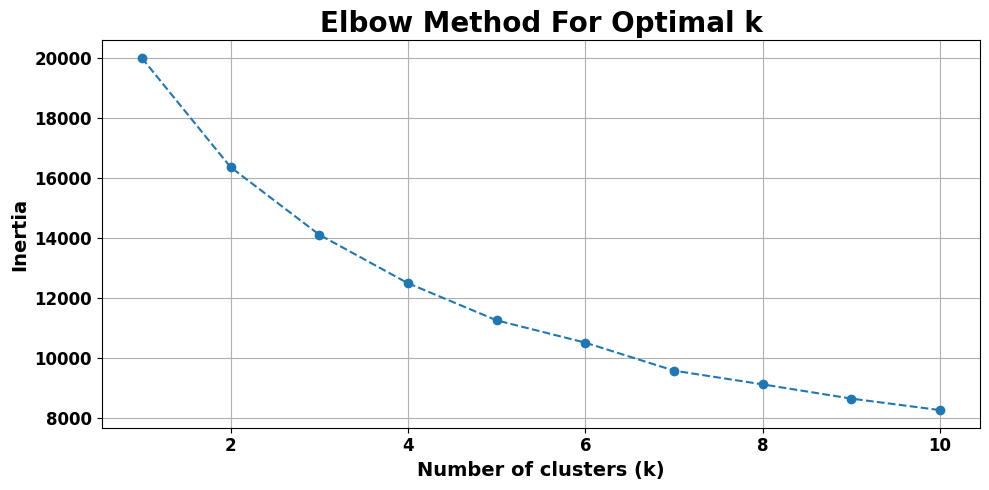

In [4]:
# Plot the Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k', fontsize=20, fontweight='bold')
plt.xlabel('Number of clusters (k)', fontsize=14, fontweight='bold')
plt.ylabel('Inertia', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
from sklearn.cluster import KMeans

# Perform KMeans clustering with 3 clusters
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
soil_clusters = kmeans.fit_predict(soil_features_scaled)

df['Soil_Type_Cluster'] = soil_clusters

# Map cluster IDs to real soil type names
soil_type_mapping = {
    0: 'Sandy Loam',
    1: 'Clay Soil',
    2: 'Loamy Soil'
}

df['Soil_Type'] = df['Soil_Type_Cluster'].map(soil_type_mapping)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [5]:
df[['Nitrogen_N_mg/kg', 'Phosphorus_P_mg/kg', 'Potassium_K_mg/kg', 'Soil_Moisture_%', 'Soil_Type']].head()

,Nitrogen_N_mg/kg,Phosphorus_P_mg/kg,Potassium_K_mg/kg,Soil_Moisture_%,Soil_Type
0,750.965158,28.193154,191.991431,27.844360,Loamy Soil
1,784.305016,27.764688,254.701099,34.519483,Clay Soil
2,794.938568,15.758590,149.447401,26.836535,Sandy Loam
3,992.682541,32.693723,182.747921,35.164865,Loamy Soil
4,686.475356,8.605565,201.999587,24.459244,Sandy Loam


| **Cluster ID** | **Assigned Soil Type Name** | **Reason for This Mapping** |
|:--------------|:----------------------------|:-----------------------------|
| 0             | **Sandy Loam**               | Lower Nitrogen, Lower Phosphorus, Moderate Soil Moisture → typical of lighter, sandy soils that drain fast and are less nutrient-rich. |
| 1             | **Clay Soil**                | Higher Nitrogen, Higher Potassium, Higher Moisture → typical of heavy clay soils that retain water and nutrients strongly. |
| 2             | **Loamy Soil**               | Moderate Nitrogen, Moderate Phosphorus, Good Balance of Moisture → loam is known for being a fertile, balanced soil mix. |


In [6]:
df.to_csv('soil_type_data.csv', index=False)

In [4]:
import joblib

joblib.dump(scaler, 'soil_scaler.pkl')
joblib.dump(kmeans, 'soil_type_model.pkl')
print("Soil type clustering model and scaler saved successfully.'")

Soil type clustering model and scaler saved successfully.'
